<a href="https://colab.research.google.com/github/dfirm/iads_day2/blob/main/CatvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)
import zipfile

3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]


In [2]:
import tensorflow.keras; 
print("Keras " + tensorflow.keras.__version__)
print("Tensorflow " + tensorflow.__version__)

Keras 2.5.0
Tensorflow 2.5.0


In [3]:
import os,sys
from numpy.core.shape_base import block
from zipfile import ZipFile
os.environ['KAGGLE_USERNAME'] = "" # username from the json file
os.environ['KAGGLE_KEY'] = "" # key from the json file
# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.4/bin")
!kaggle competitions download -c dogs-vs-cats 

train.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

# Get all the paths
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

# Make new base directory
original_dataset_dir = '/content/train'
base_dir = './cats_and_dogs_small'

if not os.path.isdir(base_dir):
  os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')

if not os.path.isdir(train_dir):
  os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')

if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')

if not os.path.isdir(test_dir):
  os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')

if not os.path.isdir(train_cats_dir):
  os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')

if not os.path.isdir(train_dogs_dir):
  os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')

if not os.path.isdir(validation_cats_dir):
  os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

if not os.path.isdir(validation_dogs_dir):
  os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')

if not os.path.isdir(test_cats_dir):
  os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')

if not os.path.isdir(test_dogs_dir):
  os.mkdir(test_dogs_dir)

import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


done
25000
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

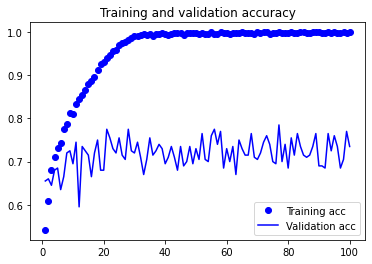

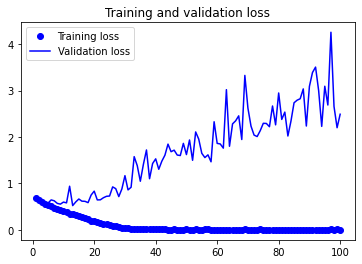

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 16s 156ms/step - loss: 0.7013 - acc: 0.5015 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 2/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6951 - acc: 0.5130 - val_loss: 0.6861 - val_acc: 0.5250
Epoch 3/50
100/100 [==============================] - 16s 158ms/step - loss: 0.6917 - acc: 0.5210 - val_loss: 0.6946 - val_acc: 0.4800
Epoch 4/50
100/100 [==============================] - 15s 152ms/step - loss: 0.6899 - acc: 0.5225 - val_loss: 0.6769 - val_acc: 0.5300
Epoch 5/50
100/100 [==============================] - 15s 151ms/step - loss: 0.6783 - acc: 0.5635 - val_loss: 0.6594 - val_acc: 0.5850
Epoch 6/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6693 - acc: 0.5655 - val_loss: 0.6891 - val_acc: 0.5750
Epoch 7/50
100/100 [==============================] - 16s 159ms/step - loss: 0.6627 - acc: 0.5945 - val_lo

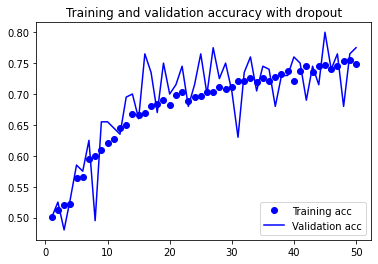

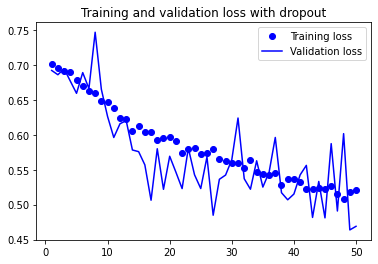

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=10)

model.save('cats_and_dogs_small_1.h5')

import cv2
import numpy as np

img = cv2.imread('/content/cats_and_dogs_small/train/cats/cat.10.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

#y = model.predict_classes(img)
y= (model.predict(img) > 0.5).astype("int32")
print(y)


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show(block=True)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.9))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
            
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history1 = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=10)


acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(1, len(acc1) + 1)

import matplotlib.pyplot as plt1


plt1.plot(epochs1, acc1, 'bo', label='Training acc')
plt1.plot(epochs1, val_acc1, 'b', label='Validation acc')
plt1.title('Training and validation accuracy with dropout')
plt1.legend()

plt1.figure()

plt1.plot(epochs1, loss1, 'bo', label='Training loss')
plt1.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt1.title('Training and validation loss with dropout')
plt1.legend()

plt1.show(block=True)


In [24]:
import cv2
import numpy as np

img = cv2.imread('/content/cute-dog-headshot[1].jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

#y = model.predict_classes(img)
y= (model.predict(img) > 0.5).astype("int32")
print(y)



[[1]]
